- Name: Himalay Parmar
- Roll No: 20 PBD 035
- Subject:DATA VISUALIZATION AND MODELING IN OPERATIONS MANAGEMENT(PBD- 3803)	Mark weightage:10


The data set presents employee survey from a software company indicating if there is attrition or not. Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff.  Build a classification model to predict if an employee is likely to quit that could greatly increase the HR’s ability to intervene on time and remedy the situation to prevent attrition. Identify the main characteristics that affect Attrition.

The data description is given below

- Age: Age of an Employee (Numeric)
- Attrition: Employee Leaving the Company (0=No, 1=Yes)
- Business Travel: Non-Travel, Travel Frequently, Tavel Rarely (Categorical)
- Department: HR, R&D, Sales (Categorical)
- Education Field: HR, Life Sciences, Marketing, Medical Sciences, Others, Tehcnical (Categorical)
- Employer No. Employee Id (Numeric)
- Gender: Female, Male (Categorical)
- Job-Role: Healthcare Rep, Human Resources, Lab Technician, Manager, Managing Director,  Research Director, Research Scientist, Sales Executive,  Sales Representative( Categorical)
- Marital Status: Divorced, Married, Single (Categorical)
- Monthly Income: Monthly Salary in Rs. (Numeric)
- Overtime: No, Yes (Categorical)
- Total Working Years: Total Years Worked (Numeric)
- Training Time Last Year: Hours Spent Training (Numeric)
- Years At Company: Total Number of Years at the Company (Numeric)
- Years In Current Role: Total Number of Years in Current Role (Numeric)
- Years Since Last Promotion: Number of years Since last promotion (Numeric)
- Years With Current Manager: Years Spent with Current Manager (Numeric)



In [68]:
#importing some major lib

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
class color:
    
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'


In [2]:
df=pd.read_csv("HR_35.csv")

In [3]:
print("Total number of rows and col are",df.shape)
df.head()

Total number of rows and col are (1470, 17)


,Age,Attrition,BusinessTravel,Department,EducationField,EmployeeNumber,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,Life Sciences,1,Female,Sales Executive,Single,5993,Yes,8,0,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,Life Sciences,2,Male,Research Scientist,Married,5130,No,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,Other,4,Male,Laboratory Technician,Single,2090,Yes,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,Life Sciences,5,Female,Research Scientist,Married,2909,Yes,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,Medical,7,Male,Laboratory Technician,Married,3468,No,6,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EmployeeNumber           1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobRole                  1470 non-null   object
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  OverTime                 1470 non-null   object
 11  TotalWorkingYears        1470 non-null   int64 
 12  TrainingTimesLastYear    1470 non-null   int64 
 13  YearsAtCompany           1470 non-null   int64 
 14  YearsInCurrentRole       1470 non-null  

EmployeeNumber is nothing but index of this dataset.

In [4]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True) 


In [5]:
df.describe()

,Age,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,4707.956783,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,19999.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
#collecting all catogical columns and saving in obj list
obj=list(df.select_dtypes(['object']).columns)
obj

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [7]:
for i in obj:
    print(i, df[i].nunique(),df[i].unique())

Attrition 2 ['Yes' 'No']
BusinessTravel 3 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department 3 ['Sales' 'Research & Development' 'Human Resources']
EducationField 6 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender 2 ['Female' 'Male']
JobRole 9 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus 3 ['Single' 'Married' 'Divorced']
OverTime 2 ['Yes' 'No']


### Obtaining Proportion of all the Categorical columns.

In [30]:
for i in obj:
    print(i,"The Proportion")
    print("-----------")
    print(df[i].value_counts(normalize=True)*100)
    print(i,"Values are")
    print( df[i].value_counts())
    print("-----------")

Attrition The Proportion
-----------
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64
Attrition Values are
No     1233
Yes     237
Name: Attrition, dtype: int64
-----------
BusinessTravel The Proportion
-----------
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64
BusinessTravel Values are
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-----------
Department The Proportion
-----------
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64
Department Values are
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-----------
EducationField The Proportion
-----------
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     

### Obtain a table for counts of Attrition VS All Other ? 

In [49]:
def tablecount(a,b):
    print(pd.crosstab(df[a],df[b]))

In [51]:
tablecount('Attrition','Gender')

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150


In [48]:
for i in obj:
    print(color.BOLD + 'Table for Attition vs',i + color.END)
    print(pd.crosstab(df['Attrition'],df[i]))
    print("--------------------------------------------")

Table for Attition vs Attrition
Attrition    No  Yes
Attrition           
No         1233    0
Yes           0  237
--------------------------------------------
Table for Attition vs BusinessTravel
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156
--------------------------------------------
Table for Attition vs Department
Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92
--------------------------------------------
Table for Attition vs EducationField
EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No      

### EDA(Hist, Bar)

array([[<AxesSubplot:title={'center':'Divorced'}>,
        <AxesSubplot:title={'center':'Married'}>],
       [<AxesSubplot:title={'center':'Single'}>, <AxesSubplot:>]],
      dtype=object)

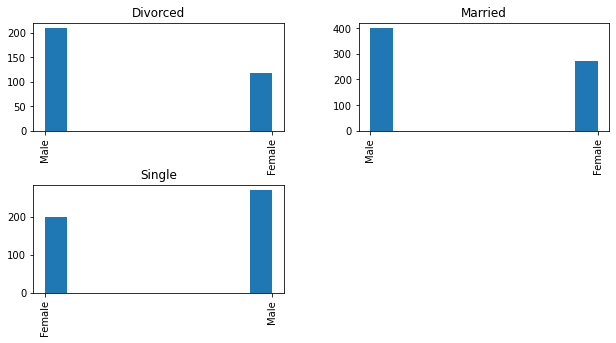

In [5]:
df.hist(by='MaritalStatus',column='Gender',figsize=(10,5))


array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

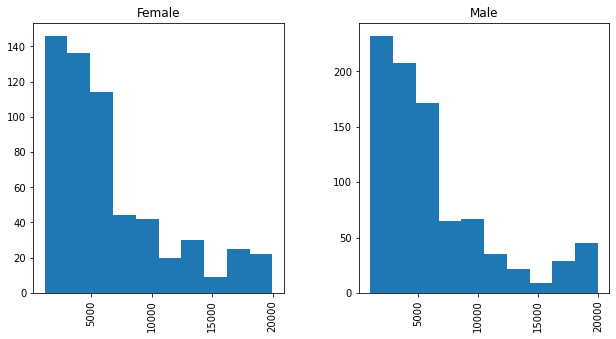

In [31]:
df.hist(by='Gender',column='MonthlyIncome',figsize=(10,5))

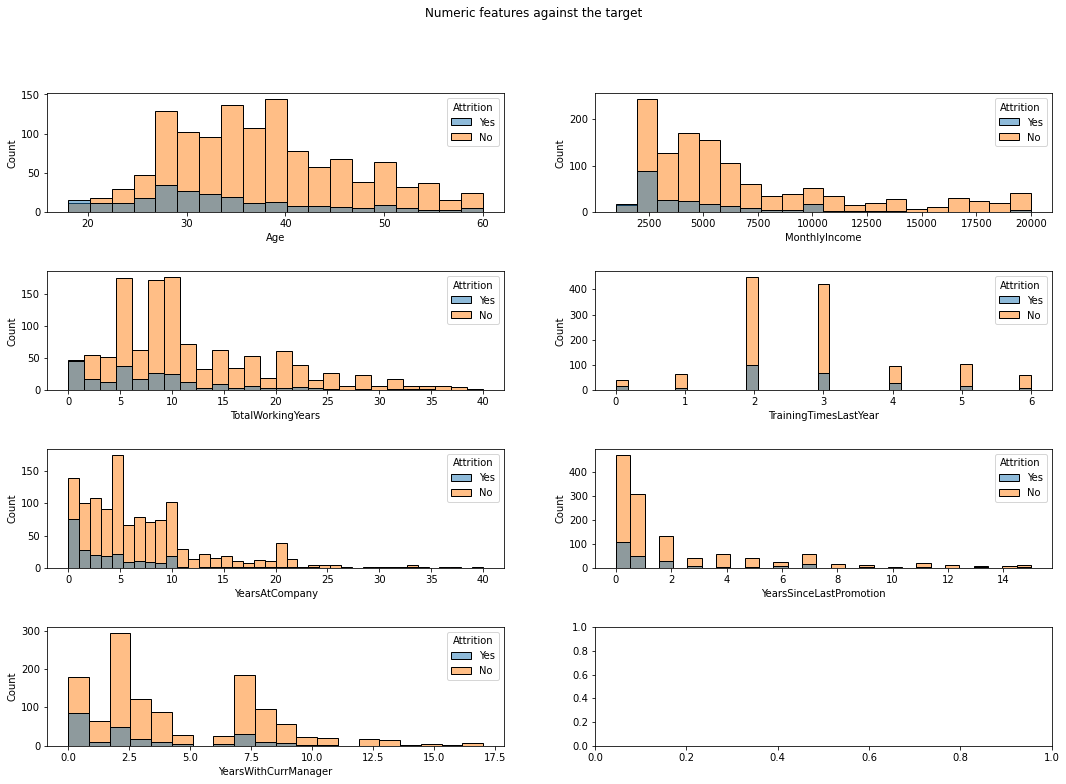

In [75]:
# make a grid space 
list_ratio=['Age','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,12))
# hspace lets us see the names of each feature
fig.subplots_adjust(hspace=0.5)
# gives the plot a title
fig.suptitle('Numeric features against the target')
# for loop to populate each subplot with a chart
for feat, ax in zip(list_ratio, axes.flatten()):
    sns.histplot(data=df, x=feat, hue='Attrition', ax=ax)

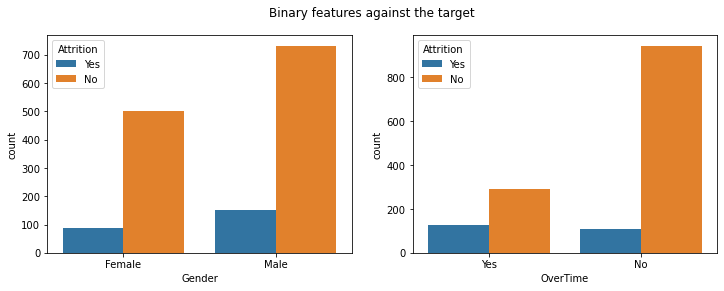

In [76]:
list_binary=['Gender', 'OverTime']
fig, axes = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Binary features against the target')
for feat, ax in zip(list_binary, axes.flatten()):
    sns.countplot(data=df, x=feat, hue='Attrition', ax=ax)

Conlusion
- There seems to be no big differnece between Gender
- Employees how do OverTime are more likely to leave

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

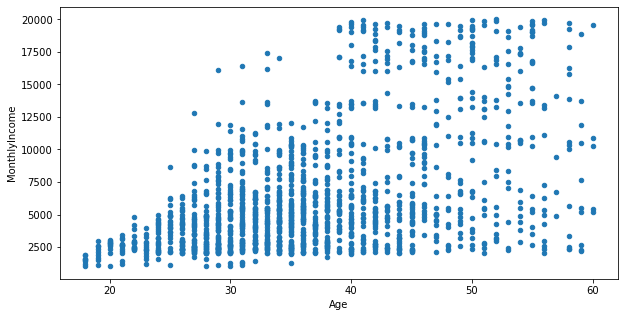

In [24]:
df.plot.scatter(y='MonthlyIncome',x='Age',figsize=(10,5))

<b>Conclusion : We can clearly observe here that employees with lesser age have lesser income.</b>

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

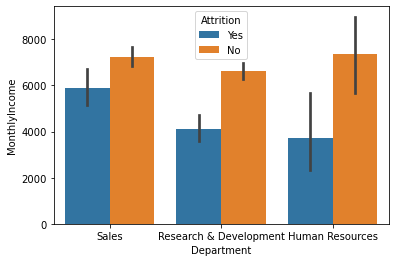

In [25]:
sns.barplot(x="Department",
           y="MonthlyIncome",
           hue="Attrition",
           data=df)

<b>  checking the average monthly income of different departments based on their attrition. It is clear that for the employees whose monthly income is less, the chances of attrition are high.

<AxesSubplot:xlabel='JobRole', ylabel='YearsInCurrentRole'>

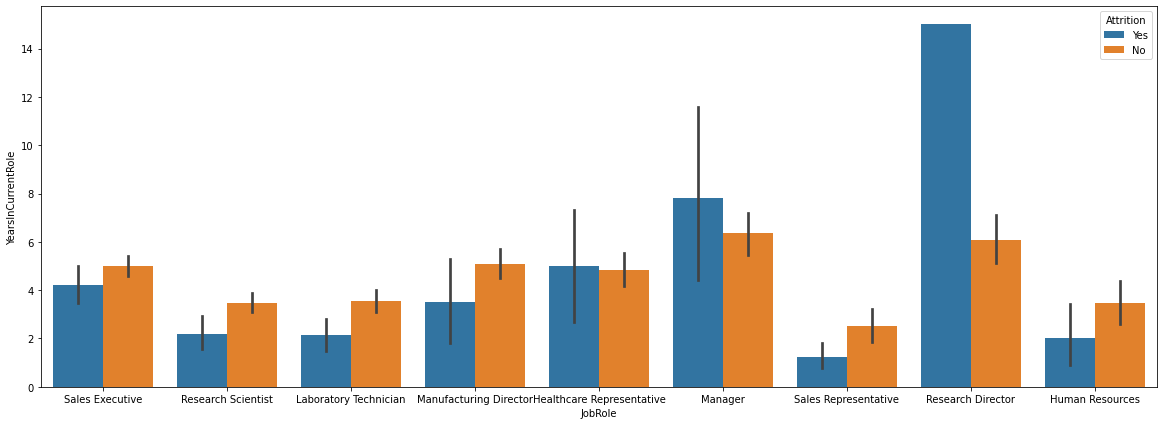

In [50]:
plt.figure(figsize=(20,7))
sns.barplot(x="JobRole",
           y="YearsInCurrentRole",
           hue="Attrition",
           data=df)

<b>Conlusion: It is an amazing find that in the Research Director job role, employees want to stay. but after got good working experience, they attrition. 

In [45]:
df.head(1)

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,5993,Yes,8,0,6,4,0,5


array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

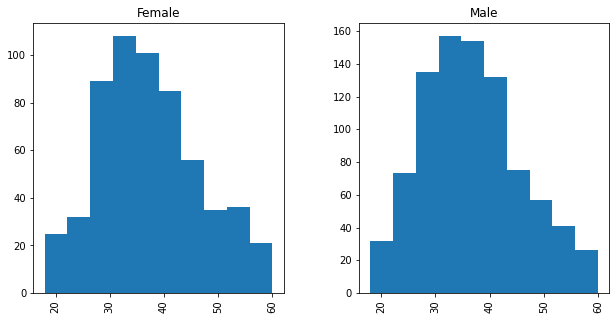

In [32]:
df.hist(by='Gender',column='Age',figsize=(10,5))

<AxesSubplot:xlabel='EducationField', ylabel='MonthlyIncome'>

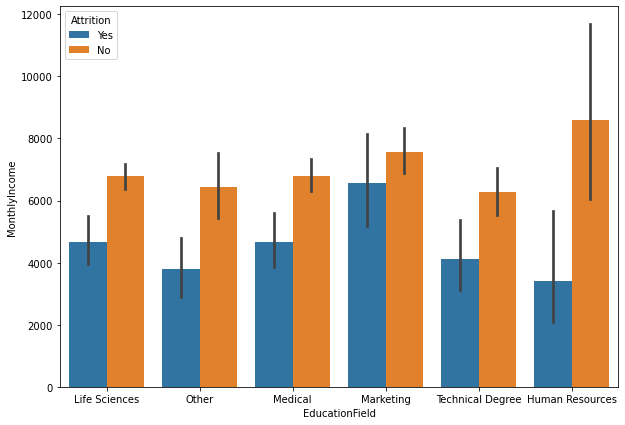

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(x="EducationField",
           y="MonthlyIncome",
           hue="Attrition",
           data=df)

<b>Conlusion: It is clear that in the HR, the attrition rate is very low. In the marketing, it is high..

### Outlier Remove for Logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age'>

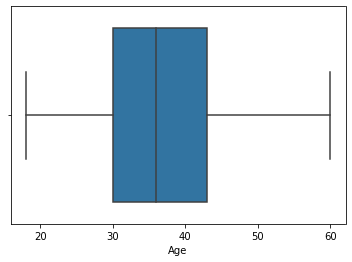

In [13]:
sns.boxplot(df['Age'])

In [8]:
df1=df

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

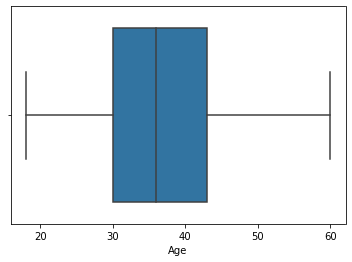

In [57]:
sns.boxplot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

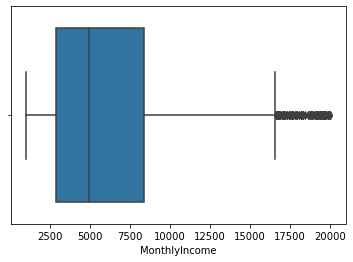

In [59]:
sns.boxplot(df['MonthlyIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

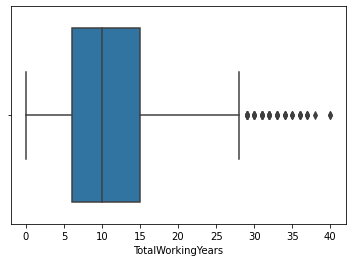

In [60]:
sns.boxplot(df['TotalWorkingYears'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear'>

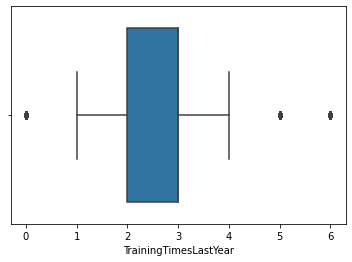

In [67]:
sns.boxplot(df['TrainingTimesLastYear'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

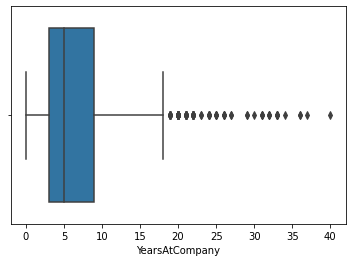

In [62]:
sns.boxplot(df['YearsAtCompany'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsInCurrentRole'>

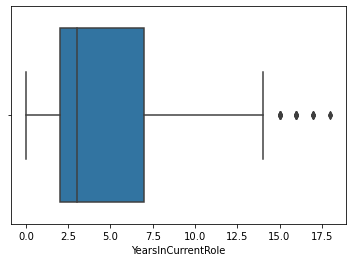

In [63]:
sns.boxplot(df['YearsInCurrentRole'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

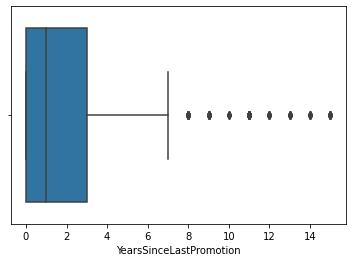

In [64]:
sns.boxplot(df['YearsSinceLastPromotion'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager'>

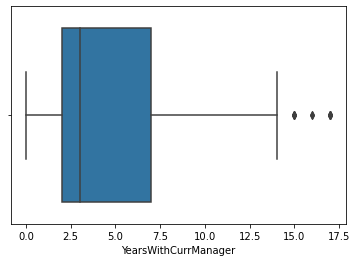

In [65]:
sns.boxplot(df['YearsWithCurrManager'])

In [71]:
out=['Age','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in out:
    print(i,'SD is',df[i].std())

Age SD is 9.135373489136732
MonthlyIncome SD is 4707.956783097994
TotalWorkingYears SD is 7.780781675514997
TrainingTimesLastYear SD is 1.2892706207958455
YearsAtCompany SD is 6.126525152403569
YearsInCurrentRole SD is 3.623137034670628
YearsSinceLastPromotion SD is 3.222430279137967
YearsWithCurrManager SD is 3.5681361205404376


In [72]:
from scipy.stats import shapiro

for i in out:
    stat, p = shapiro(df[i])
    print('For',i,'Statistics=%.3f, p=%.3f' % (stat, p))
    
# interpret
    alpha = 0.05
    if p > alpha:
        print(i,'looks Gaussian (fail to reject H0)')
    else:
        print(i,'does not look Gaussian (reject H0)')

For Age Statistics=0.977, p=0.000
Age does not look Gaussian (reject H0)
For MonthlyIncome Statistics=0.828, p=0.000
MonthlyIncome does not look Gaussian (reject H0)
For TotalWorkingYears Statistics=0.907, p=0.000
TotalWorkingYears does not look Gaussian (reject H0)
For TrainingTimesLastYear Statistics=0.895, p=0.000
TrainingTimesLastYear does not look Gaussian (reject H0)
For YearsAtCompany Statistics=0.839, p=0.000
YearsAtCompany does not look Gaussian (reject H0)
For YearsInCurrentRole Statistics=0.896, p=0.000
YearsInCurrentRole does not look Gaussian (reject H0)
For YearsSinceLastPromotion Statistics=0.704, p=0.000
YearsSinceLastPromotion does not look Gaussian (reject H0)
For YearsWithCurrManager Statistics=0.897, p=0.000
YearsWithCurrManager does not look Gaussian (reject H0)


In [81]:
from scipy.stats import iqr

def outlier(df,ll):
    for i in ll:
        print("IQR for",i,df[i].quantile(.75)-df[i].quantile(0.25))
        print(i,"Q1",df[i].quantile(0.25)-iqr(df[i])*1.5)
        print(i,"Q3",df[i].quantile(0.75)+iqr(df[i])*1.5)
        print("-------------------------------------------")

In [82]:
outlier(df,out)

IQR for Age 13.0
Age Q1 10.5
Age Q3 62.5
-------------------------------------------
IQR for MonthlyIncome 5468.0
MonthlyIncome Q1 -5291.0
MonthlyIncome Q3 16581.0
-------------------------------------------
IQR for TotalWorkingYears 9.0
TotalWorkingYears Q1 -7.5
TotalWorkingYears Q3 28.5
-------------------------------------------
IQR for TrainingTimesLastYear 1.0
TrainingTimesLastYear Q1 0.5
TrainingTimesLastYear Q3 4.5
-------------------------------------------
IQR for YearsAtCompany 6.0
YearsAtCompany Q1 -6.0
YearsAtCompany Q3 18.0
-------------------------------------------
IQR for YearsInCurrentRole 5.0
YearsInCurrentRole Q1 -5.5
YearsInCurrentRole Q3 14.5
-------------------------------------------
IQR for YearsSinceLastPromotion 3.0
YearsSinceLastPromotion Q1 -4.5
YearsSinceLastPromotion Q3 7.5
-------------------------------------------
IQR for YearsWithCurrManager 5.0
YearsWithCurrManager Q1 -5.5
YearsWithCurrManager Q3 14.5
-------------------------------------------


In [84]:
df1.shape

(1470, 16)

In [94]:
df1=df1.drop(df1[df1['TotalWorkingYears']>28.5 ].index)


In [111]:
df1.shape

(1063, 16)

In [96]:
df1=df1.drop(df1[df1['MonthlyIncome']>16581.0 ].index)


In [100]:
df1=df1.drop(df1[df1['TrainingTimesLastYear']>4.5 ].index)
df1=df1.drop(df1[df1['TrainingTimesLastYear']<0.5 ].index)


In [102]:
df1=df1.drop(df1[df1['YearsAtCompany']>18 ].index)


In [104]:
df1=df1.drop(df1[df1['YearsInCurrentRole']>14.5 ].index)


In [108]:
df1=df1.drop(df1[df1['YearsSinceLastPromotion']>7.5 ].index)


In [110]:
df1=df1.drop(df1[df1['YearsWithCurrManager']>14.5 ].index)


In [69]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,5993,Yes,8,0,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,5130,No,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,2090,Yes,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,2909,Yes,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,3468,No,6,3,2,2,2,2


In [10]:
le=LabelEncoder()
df1=df.apply(LabelEncoder().fit_transform)
df1

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,2,1,0,7,2,809,1,8,0,6,4,0,5
1,31,0,1,1,1,1,6,1,682,0,10,3,10,7,1,7
2,19,1,2,1,4,1,2,2,62,1,7,3,0,0,0,0
3,15,0,1,1,1,0,6,1,313,1,8,3,8,7,3,0
4,9,0,2,1,3,1,2,1,399,0,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,1,3,1,2,1,210,0,17,3,5,2,0,3
1466,21,0,2,1,3,1,0,1,1070,0,9,5,7,7,1,7
1467,9,0,2,1,1,1,4,1,821,1,6,0,6,2,0,3
1468,31,0,1,2,3,1,7,1,730,0,17,3,9,6,0,8


In [11]:
df1=df.apply(LabelEncoder().fit_transform)
df1

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,2,1,0,7,2,809,1,8,0,6,4,0,5
1,31,0,1,1,1,1,6,1,682,0,10,3,10,7,1,7
2,19,1,2,1,4,1,2,2,62,1,7,3,0,0,0,0
3,15,0,1,1,1,0,6,1,313,1,8,3,8,7,3,0
4,9,0,2,1,3,1,2,1,399,0,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,1,3,1,2,1,210,0,17,3,5,2,0,3
1466,21,0,2,1,3,1,0,1,1070,0,9,5,7,7,1,7
1467,9,0,2,1,1,1,4,1,821,1,6,0,6,2,0,3
1468,31,0,1,2,3,1,7,1,730,0,17,3,9,6,0,8


In [83]:
df1

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,2,1,0,7,2,809,1,8,0,6,4,0,5
1,31,0,1,1,1,1,6,1,682,0,10,3,10,7,1,7
2,19,1,2,1,4,1,2,2,62,1,7,3,0,0,0,0
3,15,0,1,1,1,0,6,1,313,1,8,3,8,7,3,0
4,9,0,2,1,3,1,2,1,399,0,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,1,3,1,2,1,210,0,17,3,5,2,0,3
1466,21,0,2,1,3,1,0,1,1070,0,9,5,7,7,1,7
1467,9,0,2,1,1,1,4,1,821,1,6,0,6,2,0,3
1468,31,0,1,2,3,1,7,1,730,0,17,3,9,6,0,8


In [12]:
x=df1.drop('Attrition', axis = 1) 
y=df1['Attrition']

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


In [15]:
df1.corr()

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,-0.031882,-0.040873,-0.036311,-0.122427,-0.095029,0.472198,0.028062,0.680409,-0.019621,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,0.063991,0.026846,0.029453,0.067151,0.162070,-0.196165,0.246118,-0.171571,-0.059478,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.009044,0.023724,-0.032981,0.002724,0.024001,0.025095,0.016543,0.034144,0.015240,-0.014720,-0.011497,-0.032591,-0.022636
Department,-0.031882,0.063991,-0.009044,1.000000,0.013720,-0.041583,0.662431,0.056073,0.157526,0.007481,-0.015685,0.036875,0.023308,0.056315,0.040061,0.034282
EducationField,-0.040873,0.026846,0.023724,0.013720,1.000000,-0.002504,0.015599,0.014420,-0.044306,0.002259,-0.027833,0.049195,-0.018987,-0.010506,0.002326,-0.004130
Gender,-0.036311,0.029453,-0.032981,-0.041583,-0.002504,1.000000,-0.039723,-0.047183,-0.044121,-0.041924,-0.046875,-0.038787,-0.030797,-0.041483,-0.026985,-0.030599
JobRole,-0.122427,0.067151,0.002724,0.662431,0.015599,-0.039723,1.000000,0.067957,-0.068005,0.040662,-0.145392,0.001342,-0.082870,-0.028354,-0.046384,-0.041150
MaritalStatus,-0.095029,0.162070,0.024001,0.056073,0.014420,-0.047183,0.067957,1.000000,-0.076762,-0.017521,-0.078032,0.010629,-0.060648,-0.065822,-0.030915,-0.038570
MonthlyIncome,0.472198,-0.196165,0.025095,0.157526,-0.044306,-0.044121,-0.068005,-0.076762,1.000000,0.009069,0.705164,-0.028533,0.489707,0.406535,0.324573,0.377748
OverTime,0.028062,0.246118,0.016543,0.007481,0.002259,-0.041924,0.040662,-0.017521,0.009069,1.000000,0.012678,-0.079113,-0.012559,-0.029758,-0.012239,-0.041586


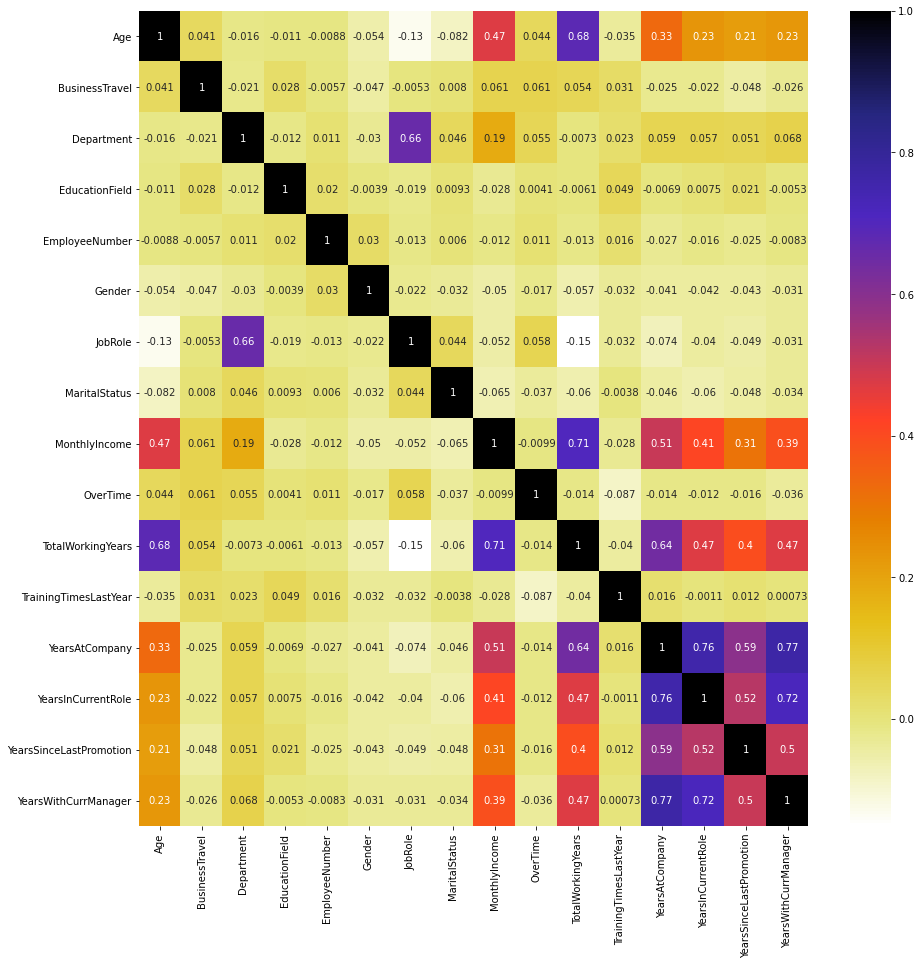

In [83]:
plt.figure(figsize=(15,15))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [240]:
CF=correlation(X_train,0.85)
len(set(CF))

0

In [241]:
CF

set()

In [18]:
import statsmodels.api as sm


In [19]:
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.344423
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  984
Model:                          Logit   Df Residuals:                      969
Method:                           MLE   Df Model:                           14
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1932
Time:                        11:22:08   Log-Likelihood:                -338.91
converged:                       True   LL-Null:                       -420.09
Covariance Type:            nonrobust   LLR p-value:                 2.393e-27
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0323      0.015     -2.207      0.027      -0.061   

As we cam that Totalworkingyears and yearsatcompany are not significants. So we are removing these two columns from dataset and we will build out logistic model again.

In [55]:
X_train=X_train.drop(columns=['YearsAtCompany'],axis=True)
X_train.head()

,Age,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1109,12,2,2,5,1,7,1,1028,0,9,3,2,1,3
77,27,2,1,4,1,5,1,1175,1,17,3,0,0,0
1042,26,0,1,1,1,2,2,356,0,7,5,2,0,3
287,20,2,1,1,1,0,0,781,0,10,2,2,1,2
1287,24,2,1,3,1,0,1,757,0,10,2,0,0,0


In [56]:
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.353220
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  984
Model:                          Logit   Df Residuals:                      970
Method:                           MLE   Df Model:                           13
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1623
Time:                        12:37:19   Log-Likelihood:                -347.57
converged:                       True   LL-Null:                       -414.90
Covariance Type:            nonrobust   LLR p-value:                 2.451e-22
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0515      0.014     -3.557      0.000      -0.080   

### LR model after remove outlier

In [114]:
df2=df1
print(df2.shape)
df2.head()


(1063, 16)


,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,31,0,1,1,1,1,6,1,682,0,10,3,10,7,1,7
2,19,1,2,1,4,1,2,2,62,1,7,3,0,0,0,0
3,15,0,1,1,1,0,6,1,313,1,8,3,8,7,3,0
4,9,0,2,1,3,1,2,1,399,0,6,3,2,2,2,2
5,14,0,1,1,1,1,2,2,346,0,8,2,7,7,3,6


In [165]:
x1=df2.drop('Attrition', axis = 1) 
y1=df2['Attrition']

In [183]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.20)


In [184]:
log_reg = sm.Logit(y_train1, X_train1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.383175
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  850
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                           14
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1646
Time:                        14:19:02   Log-Likelihood:                -325.70
converged:                       True   LL-Null:                       -389.87
Covariance Type:            nonrobust   LLR p-value:                 1.440e-20
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0344      0.014     -2.403      0.016      -0.062   

In [189]:
X_train1=X_train1.drop(columns=['TotalWorkingYears'],axis=True)


In [190]:
log_reg = sm.Logit(y_train1, X_train1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.379527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  850
Model:                          Logit   Df Residuals:                      836
Method:                           MLE   Df Model:                           13
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1726
Time:                        14:20:34   Log-Likelihood:                -322.60
converged:                       True   LL-Null:                       -389.87
Covariance Type:            nonrobust   LLR p-value:                 2.591e-22
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0398      0.012     -3.202      0.001      -0.064   

In [191]:
X_train1

,Age,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
600,14,2,1,1,0,4,1,824,0,3,14,13,6,8
830,23,2,1,1,1,2,1,623,1,4,1,0,0,0
108,7,2,1,3,1,6,1,309,0,2,2,2,2,1
854,27,2,1,3,0,6,1,567,1,2,3,2,0,2
547,24,1,1,3,1,6,0,266,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,6,0,1,1,1,2,0,247,0,4,1,0,0,0
665,29,2,2,1,0,8,2,372,1,3,3,2,1,2
172,18,1,1,3,1,2,2,60,0,3,8,7,7,2
1310,40,1,1,1,1,5,1,1222,1,3,2,2,2,2


In [192]:
log_reg = sm.Logit(y_train1, X_train1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.379527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  850
Model:                          Logit   Df Residuals:                      836
Method:                           MLE   Df Model:                           13
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1726
Time:                        14:20:34   Log-Likelihood:                -322.60
converged:                       True   LL-Null:                       -389.87
Covariance Type:            nonrobust   LLR p-value:                 2.591e-22
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0398      0.012     -3.202      0.001      -0.064   

In [193]:
X_train1=X_train1.drop(columns=['YearsInCurrentRole'],axis=True)


In [194]:
log_reg = sm.Logit(y_train1, X_train1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.379546
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  850
Model:                          Logit   Df Residuals:                      837
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1725
Time:                        14:20:37   Log-Likelihood:                -322.61
converged:                       True   LL-Null:                       -389.87
Covariance Type:            nonrobust   LLR p-value:                 7.635e-23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0397      0.012     -3.197      0.001      -0.064   

In [195]:
log_reg = sm.Logit(y_train1, X_train1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.379546
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  850
Model:                          Logit   Df Residuals:                      837
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1725
Time:                        14:20:37   Log-Likelihood:                -322.61
converged:                       True   LL-Null:                       -389.87
Covariance Type:            nonrobust   LLR p-value:                 7.635e-23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0397      0.012     -3.197      0.001      -0.064   

In [196]:
X_train1=X_train1.drop(columns=['YearsWithCurrManager'],axis=True)


In [197]:
log_reg = sm.Logit(y_train1, X_train1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.380008
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  850
Model:                          Logit   Df Residuals:                      838
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1715
Time:                        14:20:37   Log-Likelihood:                -323.01
converged:                       True   LL-Null:                       -389.87
Covariance Type:            nonrobust   LLR p-value:                 3.055e-23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0395      0.012     -3.190      0.001      -0.064   

In [198]:
X_train1=X_train1.drop(columns=['BusinessTravel'],axis=True)


In [199]:
log_reg = sm.Logit(y_train1, X_train1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.380642
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  850
Model:                          Logit   Df Residuals:                      839
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.1701
Time:                        14:20:38   Log-Likelihood:                -323.55
converged:                       True   LL-Null:                       -389.87
Covariance Type:            nonrobust   LLR p-value:                 1.343e-23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0411      0.012     -3.347      0.001      -0.065   

In [202]:
X_test1=X_test1.drop(columns=['BusinessTravel','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'],axis=True)


In [204]:
X_test1=X_test1.drop(columns=['TrainingTimesLastYear'],axis=True)


In [205]:
X_test1

,Age,Department,EducationField,JobRole,MaritalStatus,MonthlyIncome,OverTime,YearsAtCompany,YearsSinceLastPromotion
232,41,0,3,1,1,108,0,2,2
1329,11,0,3,1,1,284,0,1,0
247,16,1,1,4,1,804,0,11,5
462,16,2,1,7,2,719,0,10,5
733,8,1,3,4,1,746,0,8,1
...,...,...,...,...,...,...,...,...,...
908,15,2,2,7,0,987,1,9,0
34,6,1,3,6,1,120,1,2,2
436,15,1,3,2,0,387,0,4,1
327,21,2,3,7,1,702,1,1,0


In [242]:
yhat1 = log_reg.predict(X_test1)
prediction1 = list(map(round, yhat1))

ValueError: shapes (213,9) and (11,) not aligned: 9 (dim 1) != 11 (dim 0)

In [154]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print('Test accuracy = ', accuracy_score(y_test1, prediction1))

Test accuracy =  0.15492957746478872


In [156]:
tp, fn, fp, tn = confusion_matrix(y_test1,y_test1,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 33 0 180 0


In [159]:
confusion_matrix(y_test1, prediction1)

array([[  0, 180],
       [  0,  33]], dtype=int64)

In [161]:
confusion_matrix(y_test, prediction)

array([[372,  24],
       [ 85,   5]], dtype=int64)

In [155]:
yhat1

168     1.0
1344    1.0
1026    1.0
376     1.0
761     1.0
       ... 
1166    1.0
421     1.0
230     1.0
646     1.0
597     1.0
Length: 213, dtype: float64

In [226]:
from sklearn import metrics

In [20]:
# performing predictions on the test datdaset
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

In [134]:
X_train1=X_train1.drop(columns=['EducationField'],axis=True)


In [21]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print('Test accuracy = ', accuracy_score(y_test, prediction))

Test accuracy =  0.8353909465020576


In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [233]:
model = LogisticRegression(solver='lbfgs')

In [234]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

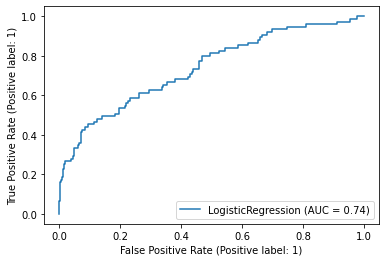

In [235]:
metrics.plot_roc_curve(model, X_test, y_test)  
plt.show()                                   

In [86]:
ns_probs = [0 for _ in range(len(y_test))]

In [82]:
lr_probs = model.predict_proba(X_test)


# Decision Tree

In [32]:
from sklearn import tree

In [220]:
clf=tree.DecisionTreeClassifier(max_depth=5)
clfmodel=clf.fit(X_train,y_train)

In [221]:
clfmodel.score(X_test,y_test)

0.8477366255144033

In [209]:
x

,Age,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,2,1,0,7,2,809,1,8,0,6,4,0,5
1,31,1,1,1,1,6,1,682,0,10,3,10,7,1,7
2,19,2,1,4,1,2,2,62,1,7,3,0,0,0,0
3,15,1,1,1,0,6,1,313,1,8,3,8,7,3,0
4,9,2,1,3,1,2,1,399,0,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,1,3,1,2,1,210,0,17,3,5,2,0,3
1466,21,2,1,3,1,0,1,1070,0,9,5,7,7,1,7
1467,9,2,1,1,1,4,1,821,1,6,0,6,2,0,3
1468,31,1,2,3,1,7,1,730,0,17,3,9,6,0,8


[Text(1244.403409090909, 2491.5, 'OverTime <= 0.5\ngini = 0.275\nsamples = 984\nvalue = [822, 162]\nclass = Yes'),
 Text(523.125, 2038.5, 'TotalWorkingYears <= 2.5\ngini = 0.185\nsamples = 698\nvalue = [626, 72]\nclass = Yes'),
 Text(190.22727272727272, 1585.5, 'JobRole <= 1.5\ngini = 0.444\nsamples = 60\nvalue = [40, 20]\nclass = Yes'),
 Text(126.81818181818181, 1132.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = No'),
 Text(253.63636363636363, 1132.5, 'MaritalStatus <= 1.5\ngini = 0.397\nsamples = 55\nvalue = [40, 15]\nclass = Yes'),
 Text(126.81818181818181, 679.5, 'MonthlyIncome <= 100.0\ngini = 0.191\nsamples = 28\nvalue = [25, 3]\nclass = Yes'),
 Text(63.40909090909091, 226.5, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]\nclass = Yes'),
 Text(190.22727272727272, 226.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = Yes'),
 Text(380.45454545454544, 679.5, 'JobRole <= 4.0\ngini = 0.494\nsamples = 27\nvalue = [15, 12]\nclass = Yes'),
 Text(317.0454545454545, 226.5, 'gini 

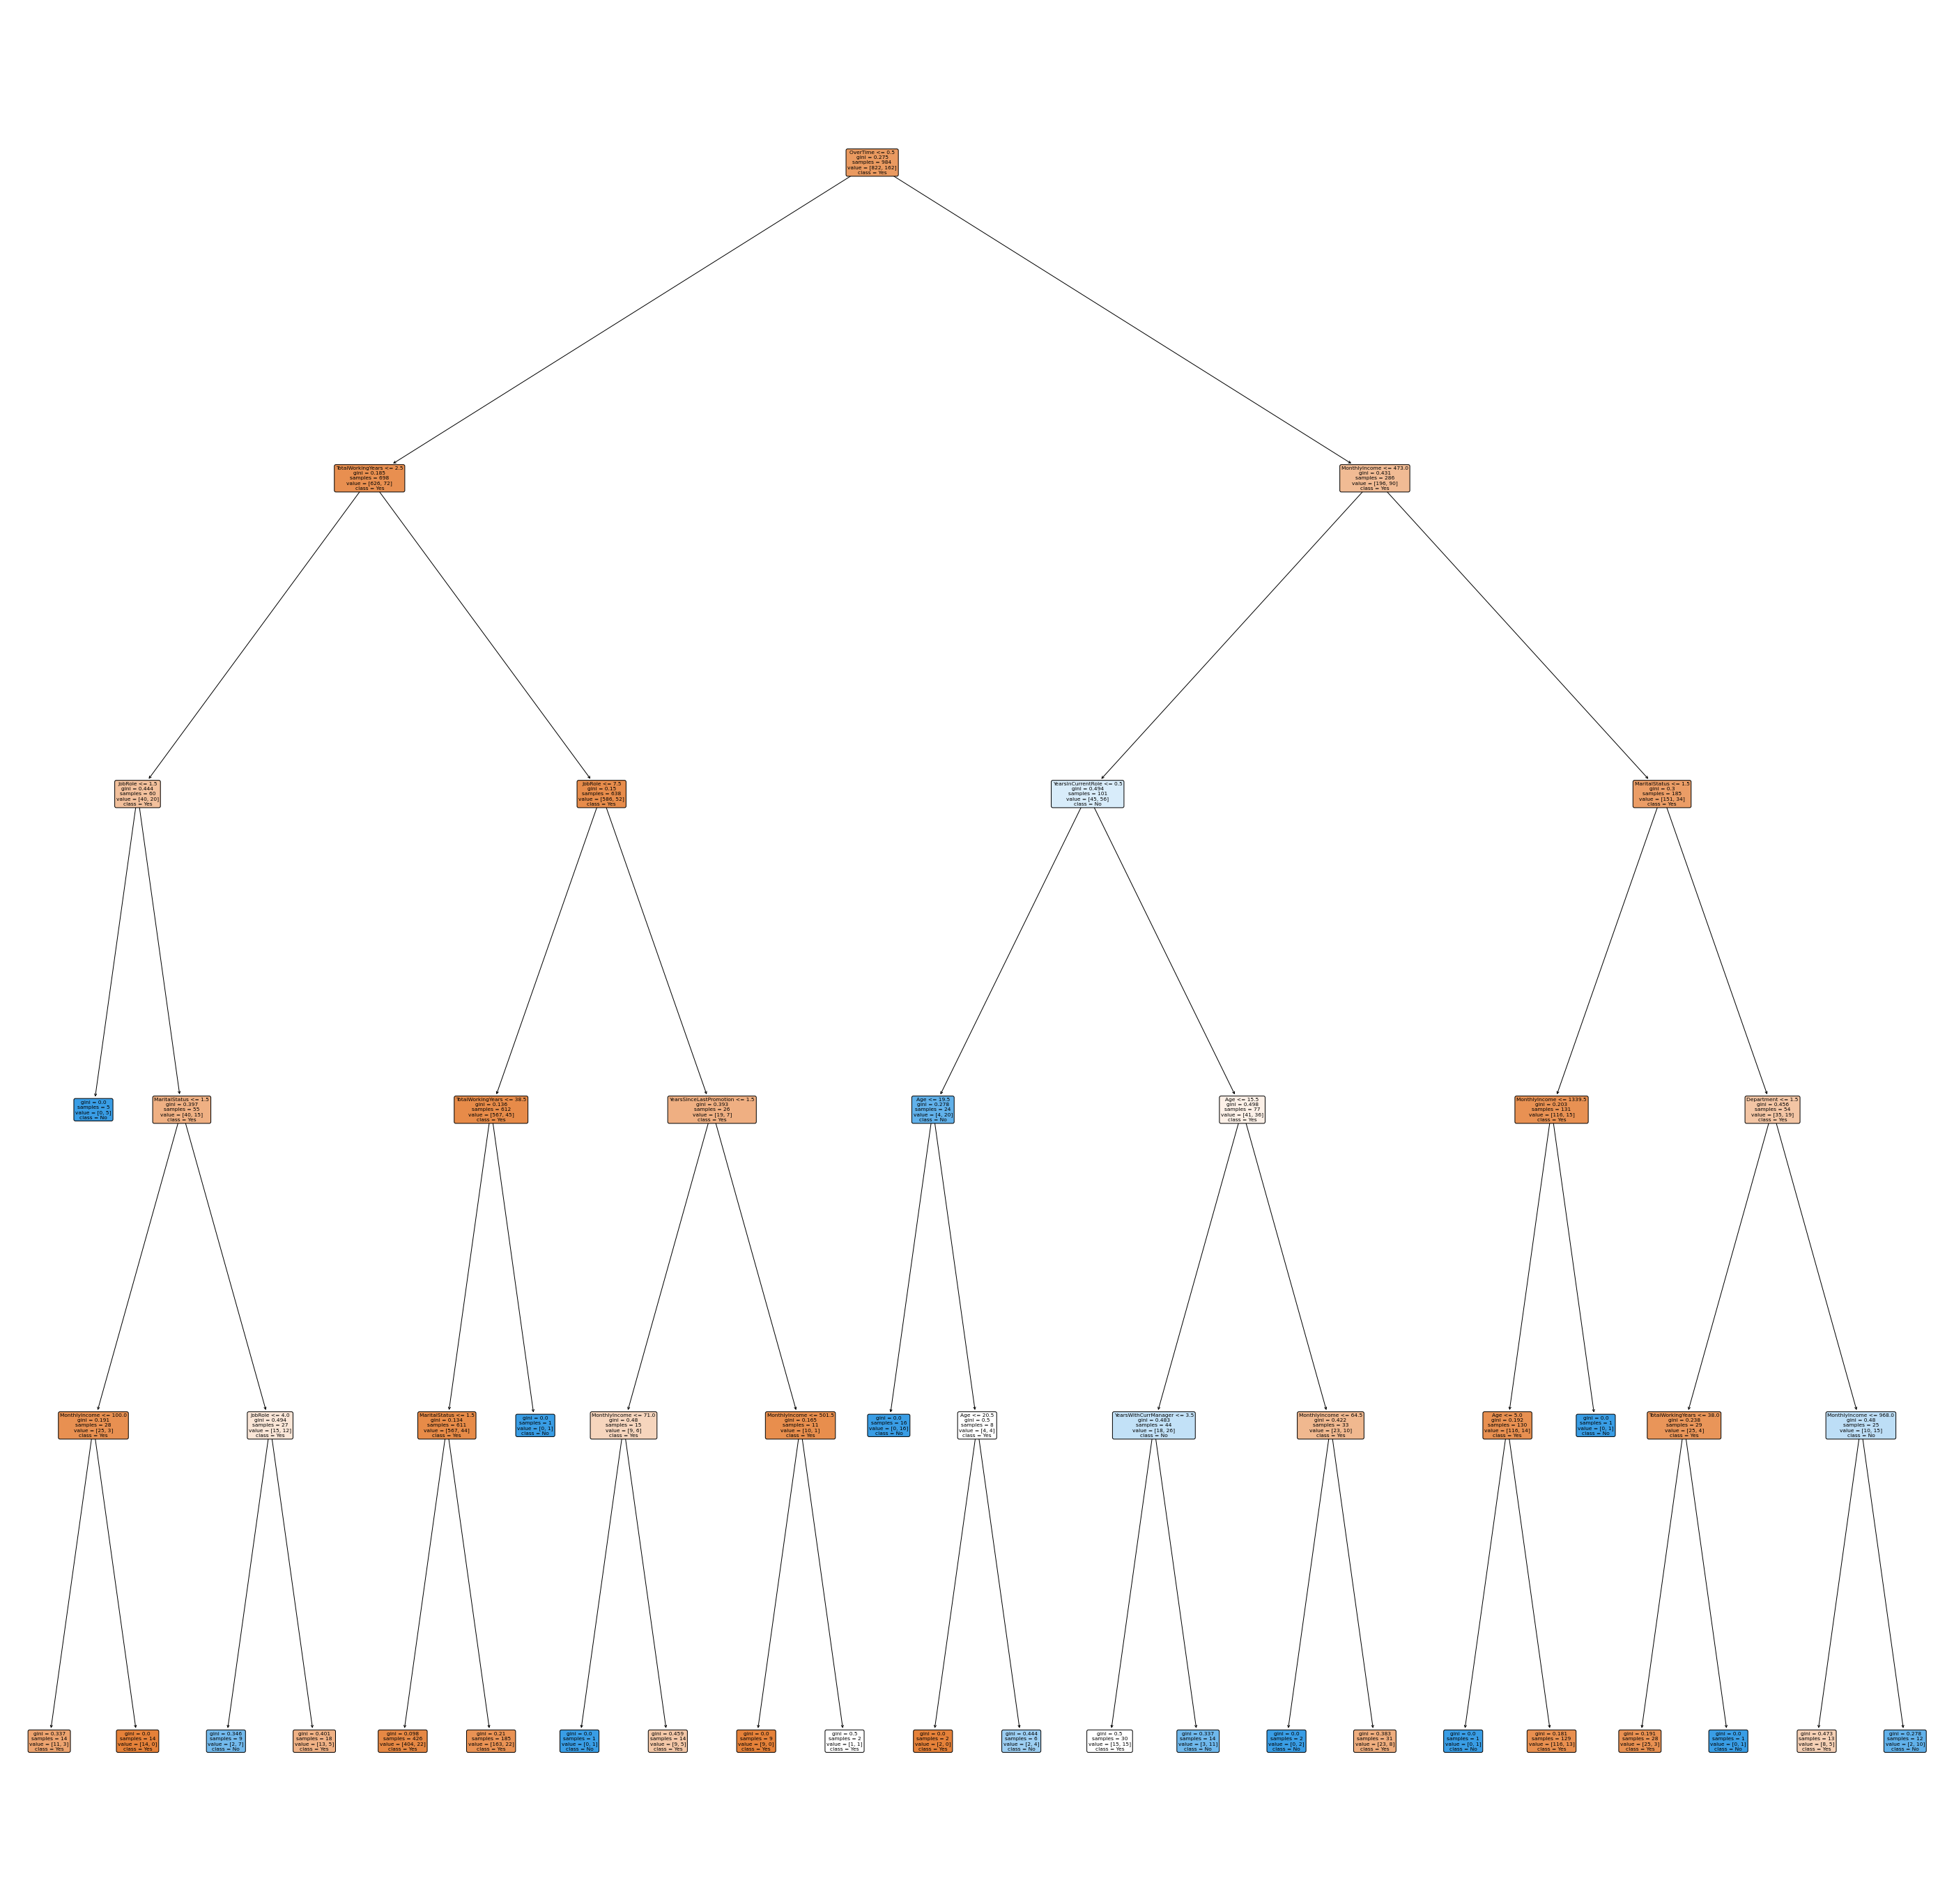

In [225]:
plt.figure(figsize=(50,50))
plot_tree(clfmodel, 
          feature_names = X_train.columns, 
          class_names = df['Attrition'], 
          filled = True, 
          rounded = True)

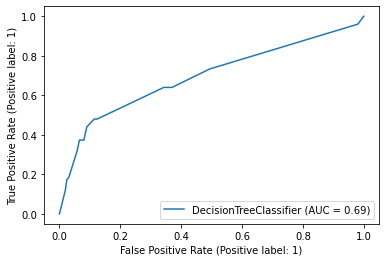

In [230]:
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()                                   

In [213]:
DTP=clfmodel.predict(X_test)

In [214]:
confusion_matrix(y_test, DTP)

array([[404,   7],
       [ 65,  10]], dtype=int64)

In [169]:
X_test

,Age,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1061,6,0,2,1,0,8,1,44,0,1,2,1,0,0,0
251,21,1,1,5,0,0,2,1132,0,20,1,19,6,11,8
900,18,1,1,5,1,6,1,432,0,12,2,11,10,0,7
869,28,2,1,1,1,5,1,1304,0,25,2,4,2,0,3
1015,16,1,1,4,1,6,0,335,0,10,2,4,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,22,2,1,1,1,6,2,603,0,9,4,9,8,8,8
857,26,2,1,1,1,6,2,320,1,6,4,6,4,0,2
1226,14,1,1,1,1,6,1,392,0,10,3,5,2,1,3
825,11,2,1,3,1,4,1,670,1,10,2,10,7,1,2


In [218]:
clf1=tree.DecisionTreeClassifier(max_depth=10)
clfmodel1=clf.fit(X_train1,y_train1)

[Text(837.0, 713.475, 'MaritalStatus <= 327.5\ngini = 0.285\nsamples = 850\nvalue = [704, 146]\nclass = Yes'),
 Text(418.5, 509.625, 'MonthlyIncome <= 0.5\ngini = 0.438\nsamples = 259\nvalue = [175, 84]\nclass = Yes'),
 Text(209.25, 305.775, 'TotalWorkingYears <= 1.5\ngini = 0.312\nsamples = 176\nvalue = [142, 34]\nclass = Yes'),
 Text(104.625, 101.92499999999995, 'gini = 0.464\nsamples = 52\nvalue = [33, 19]\nclass = Yes'),
 Text(313.875, 101.92499999999995, 'gini = 0.213\nsamples = 124\nvalue = [109, 15]\nclass = Yes'),
 Text(627.75, 305.775, 'MaritalStatus <= 185.0\ngini = 0.479\nsamples = 83\nvalue = [33, 50]\nclass = No'),
 Text(523.125, 101.92499999999995, 'gini = 0.401\nsamples = 54\nvalue = [15, 39]\nclass = No'),
 Text(732.375, 101.92499999999995, 'gini = 0.471\nsamples = 29\nvalue = [18, 11]\nclass = Yes'),
 Text(1255.5, 509.625, 'MonthlyIncome <= 0.5\ngini = 0.188\nsamples = 591\nvalue = [529, 62]\nclass = Yes'),
 Text(1046.25, 305.775, 'MaritalStatus <= 647.5\ngini = 0.145\

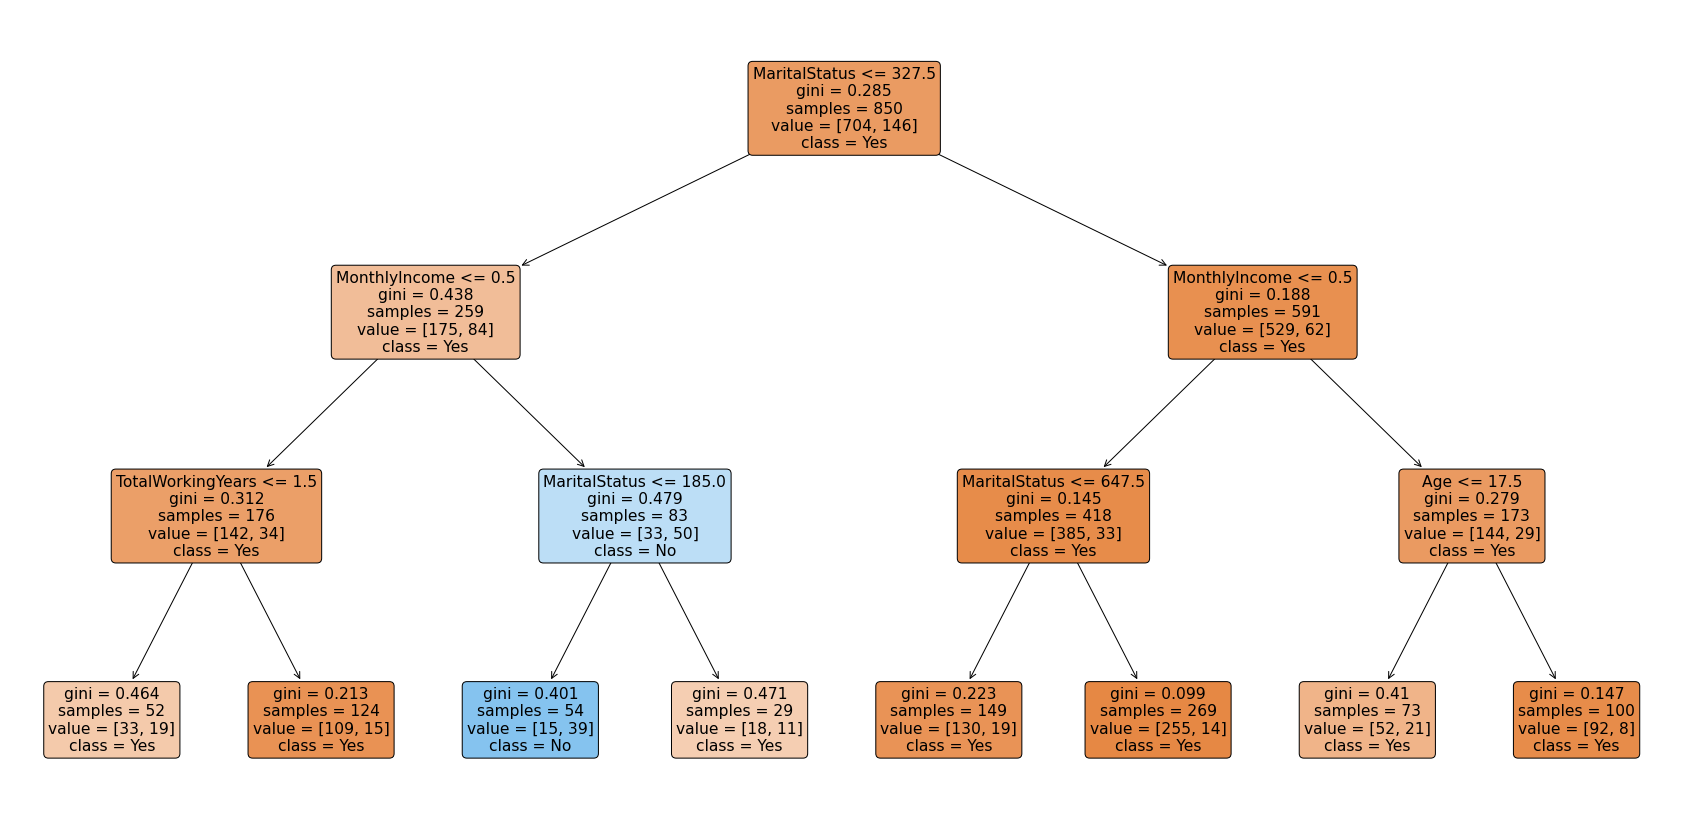

In [219]:
plt.figure(figsize=(30,15))
plot_tree(clfmodel, 
          feature_names = X_train.columns, 
          class_names = df['Attrition'], 
          filled = True, 
          rounded = True)

In [66]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,5993,Yes,8,0,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,5130,No,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,2090,Yes,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,2909,Yes,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,3468,No,6,3,2,2,2,2
